In [1]:
#Importing required libraries
import re #for Regular Expression
import nltk #for text manipulation
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

%matplotlib inline

In [2]:
#Increasing how much info is shown from a column on display
pd.set_option('display.max_colwidth',100)

In [30]:
#Importing all datasets
amazon_tweet = pd.read_csv('datasets//Amazon_tweets.csv', index_col=0)
flipkart_tweet = pd.read_csv('datasets//Flipkart_tweets.csv', index_col=0)
snapdeal_tweet = pd.read_csv('datasets//Snapdeal_tweets.csv', index_col=0)

## Data Inspection and Cleaning

In [31]:
print(amazon_tweet.shape, flipkart_tweet.shape, snapdeal_tweet.shape)

(4000, 3) (2943, 5) (1704, 3)


In [32]:
#cannot extract tweets older than 7 days from twitter, hence only 1704 tweets on snapdeal after multiple imports combined.

In [33]:
print('Snapdeal: from '+ np.min(snapdeal_tweet['Timestamp'])+' to '+ np.max(snapdeal_tweet['Timestamp']))

print('Amazon: from '+ np.min(amazon_tweet['Timestamp'])+' to '+ np.max(amazon_tweet['Timestamp']))

print('Flipkart: from '+ np.min(flipkart_tweet['Timestamp'])+' to '+ np.max(flipkart_tweet['Timestamp']))

Snapdeal: from 2021-01-08 10:30:19 to 2021-01-24 15:52:59
Amazon: from 2021-01-22 08:25:51 to 2021-01-23 08:12:28
Flipkart: from 2021-01-12 13:03:25 to 2021-01-29 04:30:31


In [34]:
#Less tweets in longer span of time for snapdeal shows it's unpopular compared to Amazon and Flipkart

In [35]:
amazon_tweet.head(2)

,Timestamp,ID,tweet
0,2021-01-23 08:12:28,1352891939566194694,"hi @amazonIN, @dominos_india, @hotstartweets and @oyorooms plz get pay later option #KeepItSimpl"
1,2021-01-23 08:12:22,1352891913301450752,@amazonIN C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n@amazonIN \n\nJ...


In [36]:
snapdeal_tweet.head(2)

,Timestamp,ID,tweet
0,2021-01-16 05:00:12,1350306837837578240,#Recap Intermediary Liability: Karnataka HC Dismisses Criminal Complaint Against Snapdeal And It...
1,2021-01-16 05:00:06,1350306813015519232,"ETRetail | Marico, Godrej and Himalaya list value-selection on Snapdeal to widen reach in non-me..."


In [37]:
flipkart_tweet.head(2)

,index,Timestamp,ID,tweet,Unnamed: 0.1
0,0,2021-01-29 04:30:31,1355010412131930114,FED UP WITH YOUR BIG FAT LIES. STOP THIS ROBOTIC (IRRELEVANT) RESPONSES. @Flipkart GET HONEST AN...,NaN
1,1,2021-01-29 04:29:31,1355010157260861441,Dear @Flipkart thanks for giving me the correct options to choose @amazonIN.\nThe reason behind...,NaN


In [38]:
flipkart_tweet.rename({'Unnamed: 0.1':'a'}, axis='columns', inplace=True)
flipkart_tweet.drop(['index','a'],axis=1, inplace=True)

In [39]:
#Making a combined Dataframe
combi=pd.concat([amazon_tweet, flipkart_tweet, snapdeal_tweet],axis=0, ignore_index=True)

In [40]:
combi.shape

(8647, 3)

In [41]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647 entries, 0 to 8646
Data columns (total 3 columns):
Timestamp    8647 non-null object
ID           8647 non-null int64
tweet        8647 non-null object
dtypes: int64(1), object(2)
memory usage: 202.7+ KB


In [42]:
combi.describe()

,ID
count,8.647000e+03
mean,1.351340e+18
std,1.817936e+15
min,1.347491e+18
25%,1.349403e+18
50%,1.352545e+18
75%,1.352653e+18
max,1.355010e+18


In [43]:
combi.describe(include='object')

,Timestamp,tweet
count,8647,8647
unique,8343,8499
top,2021-01-22 12:24:19,@amazonIN Noted
freq,4,15


In [44]:
#Alloting datetime format to Timestamp column
combi['Timestamp']=pd.to_datetime(combi['Timestamp'])
amazon_tweet['Timestamp']=pd.to_datetime(amazon_tweet['Timestamp'])
flipkart_tweet['Timestamp']=pd.to_datetime(flipkart_tweet['Timestamp'])
snapdeal_tweet['Timestamp']=pd.to_datetime(snapdeal_tweet['Timestamp'])

In [45]:
combi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8647 entries, 0 to 8646
Data columns (total 3 columns):
Timestamp    8647 non-null datetime64[ns]
ID           8647 non-null int64
tweet        8647 non-null object
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 202.7+ KB


## Text Preprocessing

In [47]:
#Creating user defined function to remove unwanted patterns from tweet
def remove_pattern(input_txt, pattern):
    r=re.findall(pattern, input_txt)
    for i in r:
        input_txt=re.sub(i,'', input_txt)
    return input_txt

In [48]:
#Removing all links
combi['tidy_tweets']=np.vectorize(remove_pattern)(combi['tweet'],  r"http\S+")
amazon_tweet['tidy_tweets']=np.vectorize(remove_pattern)(amazon_tweet['tweet'],  r"http\S+")
flipkart_tweet['tidy_tweets']=np.vectorize(remove_pattern)(flipkart_tweet['tweet'],  r"http\S+")
snapdeal_tweet['tidy_tweets']=np.vectorize(remove_pattern)(snapdeal_tweet['tweet'],  r"http\S+")
combi.head()

,Timestamp,ID,tweet,tidy_tweets
0,2021-01-23 08:12:28,1352891939566194694,"hi @amazonIN, @dominos_india, @hotstartweets and @oyorooms plz get pay later option #KeepItSimpl","hi @amazonIN, @dominos_india, @hotstartweets and @oyorooms plz get pay later option #KeepItSimpl"
1,2021-01-23 08:12:22,1352891913301450752,@amazonIN C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n@amazonIN \n\nJ...,@amazonIN C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n@amazonIN \n\nJ...
2,2021-01-23 08:12:07,1352891850835693569,"@AmazonHelp @amazonIN @amazonpay @JeffBezos If you don't send them the refund amount, what can t...","@AmazonHelp @amazonIN @amazonpay @JeffBezos If you don't send them the refund amount, what can t..."
3,2021-01-23 08:12:02,1352891831650971648,@amazonIN @amazonIN \n\n#AmazonSpecialsDeal #AmazonGreatRepublicDaySale \n\n#OPPOA53 is packed w...,@amazonIN @amazonIN \n\n#AmazonSpecialsDeal #AmazonGreatRepublicDaySale \n\n#OPPOA53 is packed w...
4,2021-01-23 08:11:25,1352891674054127616,@amazonIN Option( C) 5000mAh #OPPOA53\n #AmazonSpecialsDeal.\n#AmazonGreatRepublicDaySale,@amazonIN Option( C) 5000mAh #OPPOA53\n #AmazonSpecialsDeal.\n#AmazonGreatRepublicDaySale


In [49]:
#Removing all @ tags as they play no role in sentiment analysis
combi['tidy_tweets']=np.vectorize(remove_pattern)(combi['tidy_tweets'], '@[\w]*')
amazon_tweet['tidy_tweets']=np.vectorize(remove_pattern)(amazon_tweet['tidy_tweets'], '@[\w]*')
flipkart_tweet['tidy_tweets']=np.vectorize(remove_pattern)(flipkart_tweet['tidy_tweets'], '@[\w]*')
snapdeal_tweet['tidy_tweets']=np.vectorize(remove_pattern)(snapdeal_tweet['tidy_tweets'], '@[\w]*')

combi.head()

,Timestamp,ID,tweet,tidy_tweets
0,2021-01-23 08:12:28,1352891939566194694,"hi @amazonIN, @dominos_india, @hotstartweets and @oyorooms plz get pay later option #KeepItSimpl","hi , , and plz get pay later option #KeepItSimpl"
1,2021-01-23 08:12:22,1352891913301450752,@amazonIN C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n@amazonIN \n\nJ...,C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n \n\nJoin
2,2021-01-23 08:12:07,1352891850835693569,"@AmazonHelp @amazonIN @amazonpay @JeffBezos If you don't send them the refund amount, what can t...","If you don't send them the refund amount, what can they do? How will co…"
3,2021-01-23 08:12:02,1352891831650971648,@amazonIN @amazonIN \n\n#AmazonSpecialsDeal #AmazonGreatRepublicDaySale \n\n#OPPOA53 is packed w...,\n\n#AmazonSpecialsDeal #AmazonGreatRepublicDaySale \n\n#OPPOA53 is packed with 😍5000 MAH batt...
4,2021-01-23 08:11:25,1352891674054127616,@amazonIN Option( C) 5000mAh #OPPOA53\n #AmazonSpecialsDeal.\n#AmazonGreatRepublicDaySale,Option( C) 5000mAh #OPPOA53\n #AmazonSpecialsDeal.\n#AmazonGreatRepublicDaySale


In [50]:
#Removing all special chracters and numbers from the tweets except #
combi['tidy_tweets']=combi['tidy_tweets'].str.replace('[^a-zA-Z#]', ' ')
amazon_tweet['tidy_tweets']=amazon_tweet['tidy_tweets'].str.replace('[^a-zA-Z#]', ' ')
flipkart_tweet['tidy_tweets']=flipkart_tweet['tidy_tweets'].str.replace('[^a-zA-Z#]', ' ')
snapdeal_tweet['tidy_tweets']=snapdeal_tweet['tidy_tweets'].str.replace('[^a-zA-Z#]', ' ')

combi.head()

,Timestamp,ID,tweet,tidy_tweets
0,2021-01-23 08:12:28,1352891939566194694,"hi @amazonIN, @dominos_india, @hotstartweets and @oyorooms plz get pay later option #KeepItSimpl",hi and plz get pay later option #KeepItSimpl
1,2021-01-23 08:12:22,1352891913301450752,@amazonIN C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n@amazonIN \n\nJ...,C #OPPOA #AmazonSpecialsDeal #AmazonGreatRepublicDaySale Join
2,2021-01-23 08:12:07,1352891850835693569,"@AmazonHelp @amazonIN @amazonpay @JeffBezos If you don't send them the refund amount, what can t...",If you don t send them the refund amount what can they do How will co
3,2021-01-23 08:12:02,1352891831650971648,@amazonIN @amazonIN \n\n#AmazonSpecialsDeal #AmazonGreatRepublicDaySale \n\n#OPPOA53 is packed w...,#AmazonSpecialsDeal #AmazonGreatRepublicDaySale #OPPOA is packed with MAH battery
4,2021-01-23 08:11:25,1352891674054127616,@amazonIN Option( C) 5000mAh #OPPOA53\n #AmazonSpecialsDeal.\n#AmazonGreatRepublicDaySale,Option C mAh #OPPOA #AmazonSpecialsDeal #AmazonGreatRepublicDaySale


In [51]:
#Removing words less than 3 characters
combi['tidy_tweets']= combi['tidy_tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
amazon_tweet['tidy_tweets']= amazon_tweet['tidy_tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
flipkart_tweet['tidy_tweets']= flipkart_tweet['tidy_tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
snapdeal_tweet['tidy_tweets']= snapdeal_tweet['tidy_tweets'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

combi.head()

,Timestamp,ID,tweet,tidy_tweets
0,2021-01-23 08:12:28,1352891939566194694,"hi @amazonIN, @dominos_india, @hotstartweets and @oyorooms plz get pay later option #KeepItSimpl",later option #KeepItSimpl
1,2021-01-23 08:12:22,1352891913301450752,@amazonIN C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n@amazonIN \n\nJ...,#OPPOA #AmazonSpecialsDeal #AmazonGreatRepublicDaySale Join
2,2021-01-23 08:12:07,1352891850835693569,"@AmazonHelp @amazonIN @amazonpay @JeffBezos If you don't send them the refund amount, what can t...",send them refund amount what they will
3,2021-01-23 08:12:02,1352891831650971648,@amazonIN @amazonIN \n\n#AmazonSpecialsDeal #AmazonGreatRepublicDaySale \n\n#OPPOA53 is packed w...,#AmazonSpecialsDeal #AmazonGreatRepublicDaySale #OPPOA packed with battery
4,2021-01-23 08:11:25,1352891674054127616,@amazonIN Option( C) 5000mAh #OPPOA53\n #AmazonSpecialsDeal.\n#AmazonGreatRepublicDaySale,Option #OPPOA #AmazonSpecialsDeal #AmazonGreatRepublicDaySale


In [52]:
# Tokenization
tokenized_tweet= combi['tidy_tweets'].apply(lambda x: x.split())
amazon_tokenized_tweet= amazon_tweet['tidy_tweets'].apply(lambda x: x.split())
flipkart_tokenized_tweet= flipkart_tweet['tidy_tweets'].apply(lambda x: x.split())
snapdeal_tokenized_tweet= snapdeal_tweet['tidy_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0                                                        [later, option, #KeepItSimpl]
1                     [#OPPOA, #AmazonSpecialsDeal, #AmazonGreatRepublicDaySale, Join]
2                                       [send, them, refund, amount, what, they, will]
3    [#AmazonSpecialsDeal, #AmazonGreatRepublicDaySale, #OPPOA, packed, with, battery]
4                   [Option, #OPPOA, #AmazonSpecialsDeal, #AmazonGreatRepublicDaySale]
Name: tidy_tweets, dtype: object

In [53]:
#Stemming
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

amazon_tokenized_tweet=amazon_tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

flipkart_tokenized_tweet=flipkart_tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

snapdeal_tokenized_tweet=snapdeal_tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [54]:
tokenized_tweet.head(10)

0                                                        [later, option, #keepitsimpl]
1                         [#oppoa, #amazonspecialsd, #amazongreatrepublicdaysal, join]
2                                       [send, them, refund, amount, what, they, will]
3          [#amazonspecialsd, #amazongreatrepublicdaysal, #oppoa, pack, with, batteri]
4                       [option, #oppoa, #amazonspecialsd, #amazongreatrepublicdaysal]
5                      [batteri, #oppoa, #amazonspecialsd, #amazongreatrepublicdaysal]
6                           [option, battri, thank, opportuniti, #oppoa, have, massiv]
7    [your, bank, credit, card, from, amazon, suppli, icici, bank, pleas, read, tweet]
8                                [oppo, pack, with, batteri, #oppoa, #amazonspecialsd]
9                   [note, readi, #oppoa, #amazonspeciald, #amazongreatrepublicdaysal]
Name: tidy_tweets, dtype: object

In [55]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] =' '.join(tokenized_tweet[i])
combi['tidy_tweets']=tokenized_tweet

In [56]:
for i in range(len(amazon_tokenized_tweet)):
    amazon_tokenized_tweet[i] =' '.join(amazon_tokenized_tweet[i])
amazon_tweet['tidy_tweets']=amazon_tokenized_tweet

In [57]:
for i in range(len(flipkart_tokenized_tweet)):
    flipkart_tokenized_tweet[i] =' '.join(flipkart_tokenized_tweet[i])
flipkart_tweet['tidy_tweets']=flipkart_tokenized_tweet

In [63]:
snapdeal_tokenized_tweet.reset_index(inplace=True, drop=True)

In [64]:
for i in range(len(snapdeal_tokenized_tweet)):
    snapdeal_tokenized_tweet[i] =' '.join(snapdeal_tokenized_tweet[i])
snapdeal_tweet['tidy_tweets']=snapdeal_tokenized_tweet

In [65]:
combi.head()

,Timestamp,ID,tweet,tidy_tweets
0,2021-01-23 08:12:28,1352891939566194694,"hi @amazonIN, @dominos_india, @hotstartweets and @oyorooms plz get pay later option #KeepItSimpl",later option #keepitsimpl
1,2021-01-23 08:12:22,1352891913301450752,@amazonIN C. 5000 \n\n#OPPOA53 #AmazonSpecialsDeal\n#AmazonGreatRepublicDaySale\n@amazonIN \n\nJ...,#oppoa #amazonspecialsd #amazongreatrepublicdaysal join
2,2021-01-23 08:12:07,1352891850835693569,"@AmazonHelp @amazonIN @amazonpay @JeffBezos If you don't send them the refund amount, what can t...",send them refund amount what they will
3,2021-01-23 08:12:02,1352891831650971648,@amazonIN @amazonIN \n\n#AmazonSpecialsDeal #AmazonGreatRepublicDaySale \n\n#OPPOA53 is packed w...,#amazonspecialsd #amazongreatrepublicdaysal #oppoa pack with batteri
4,2021-01-23 08:11:25,1352891674054127616,@amazonIN Option( C) 5000mAh #OPPOA53\n #AmazonSpecialsDeal.\n#AmazonGreatRepublicDaySale,option #oppoa #amazonspecialsd #amazongreatrepublicdaysal


In [66]:
print(combi.duplicated(subset='tidy_tweets').sum())
print(amazon_tweet.duplicated(subset='tidy_tweets').sum())
print(flipkart_tweet.duplicated(subset='tidy_tweets').sum())
print(snapdeal_tweet.duplicated(subset='tidy_tweets').sum())

3510
1993
794
685


In [67]:
combi.drop_duplicates(subset='tidy_tweets', inplace=True)
amazon_tweet.drop_duplicates(subset='tidy_tweets', inplace=True)
flipkart_tweet.drop_duplicates(subset='tidy_tweets', inplace=True)
snapdeal_tweet.drop_duplicates(subset='tidy_tweets', inplace=True)

## Story Generation and Visualisation

### Hashtag Extraction

In [68]:
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r'#(\w+)', i)
        hashtags.append(ht)
        return hashtags

In [69]:
combi_ht= hashtag_extract(combi['tweet'])
amazon_ht= hashtag_extract(amazon_tweet['tweet'])
flipkart_ht= hashtag_extract(flipkart_tweet['tweet'])
snapdeal_ht= hashtag_extract(snapdeal_tweet['tweet'])

In [70]:
print(combi_ht)
print(amazon_ht)
print(flipkart_ht)
print(snapdeal_ht)

[['KeepItSimpl']]
[['KeepItSimpl']]
[[]]
[['Recap']]


In [ ]:
# No information gain for hastags here.

# Modelling

## Bag-of-words features

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [72]:
import gensim
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.cluster import KMeans

In [73]:
bow_vectorizer= CountVectorizer(max_df=0.9, min_df=2, max_features=1500)
bow=bow_vectorizer.fit_transform(combi['tidy_tweets'])
bow_amazon=bow_vectorizer.fit_transform(amazon_tweet['tidy_tweets'])
bow_flipkart=bow_vectorizer.fit_transform(flipkart_tweet['tidy_tweets'])
bow_snapdeal=bow_vectorizer.fit_transform(snapdeal_tweet['tidy_tweets'])

In [74]:
print(bow.shape)
print(bow_amazon.shape)
print(bow_flipkart.shape)
print(bow_snapdeal.shape)

(5137, 1500)
(2007, 965)
(2149, 1344)
(1019, 968)


## Tf-idf features

In [75]:
# Unlike bow features Tfidf takes into account the whole corpus instead of just one document/tweet.

In [76]:
tfidf_vectorizer=TfidfVectorizer(max_df=0.9, min_df=2,max_features=1500)
tfidf=tfidf_vectorizer.fit(combi['tidy_tweets'])
tfidf_amazon=tfidf_vectorizer.fit(amazon_tweet['tidy_tweets'])
tfidf_flipkart=tfidf_vectorizer.fit(flipkart_tweet['tidy_tweets'])
tfidf_snapdeal=tfidf_vectorizer.fit(snapdeal_tweet['tidy_tweets'])

In [77]:
tfidf.get_feature_names()

['aapk',
 'aapka',
 'aapki',
 'aapko',
 'aaps',
 'abhi',
 'about',
 'abus',
 'access',
 'account',
 'accus',
 'action',
 'activ',
 'actual',
 'address',
 'advis',
 'after',
 'again',
 'against',
 'agar',
 'agent',
 'airtel',
 'aizawl',
 'alibaba',
 'alleg',
 'allow',
 'almost',
 'alon',
 'along',
 'alreadi',
 'also',
 'altern',
 'altmoda',
 'alway',
 'amaz',
 'amazon',
 'amoun',
 'amount',
 'anoth',
 'answer',
 'anyon',
 'anyth',
 'anywher',
 'apna',
 'apni',
 'apolog',
 'app',
 'appar',
 'appli',
 'applic',
 'appreci',
 'area',
 'arrang',
 'arriv',
 'asap',
 'ashi',
 'ask',
 'assur',
 'attach',
 'ausvind',
 'autom',
 'avail',
 'ayurved',
 'ayurveda',
 'baat',
 'back',
 'badl',
 'bahl',
 'bana',
 'bank',
 'basic',
 'batteri',
 'bazaar',
 'be',
 'beat',
 'beauti',
 'becam',
 'becaus',
 'becom',
 'bedsheet',
 'been',
 'befor',
 'believ',
 'below',
 'best',
 'better',
 'between',
 'bewar',
 'bhakt',
 'bharat',
 'bharatkaregadelhikooch',
 'bigbasket',
 'biggest',
 'black',
 'blast',
 'bomb

In [78]:
features = pd.Series(tfidf.get_feature_names())

In [79]:
tfidf_vectorizer.vocabulary_.get('access')

8

In [80]:
tfidf=tfidf_vectorizer.fit(combi['tidy_tweets'])
tfidf_amazon=tfidf_vectorizer.fit(amazon_tweet['tidy_tweets'])
tfidf_flipkart=tfidf_vectorizer.fit(flipkart_tweet['tidy_tweets'])
tfidf_snapdeal=tfidf_vectorizer.fit(snapdeal_tweet['tidy_tweets'])

In [82]:
features = pd.Series(tfidf.get_feature_names())
features_amazon = pd.Series(tfidf_amazon.get_feature_names())
features_flipkart = pd.Series(tfidf_flipkart.get_feature_names())
features_snapdeal = pd.Series(tfidf_snapdeal.get_feature_names())

In [83]:
tfidf=tfidf_vectorizer.transform(combi['tidy_tweets'])
tfidf_amazon=tfidf_vectorizer.transform(amazon_tweet['tidy_tweets'])
tfidf_flipkart=tfidf_vectorizer.transform(flipkart_tweet['tidy_tweets'])
tfidf_snapdeal=tfidf_vectorizer.transform(snapdeal_tweet['tidy_tweets'])

## Word to Vector Embedding

In [84]:
# Embedding helps in redefining the high dimensionality of word features into low dimensional feature vectors,
# preserving it's contextual similarity in the corpus.

In [85]:
tokenized_tweet= combi['tidy_tweets'].apply(lambda x: x.split())
amazon_tokenized_tweet = amazon_tweet['tidy_tweets'].apply(lambda x: x.split())
flipkart_tokenized_tweet = flipkart_tweet['tidy_tweets'].apply(lambda x: x.split())
snapdeal_tokenized_tweet = snapdeal_tweet['tidy_tweets'].apply(lambda x: x.split())

In [86]:
w2v_model=gensim.models.Word2Vec(tokenized_tweet, size=1000)
w2v_model_amazon=gensim.models.Word2Vec(amazon_tokenized_tweet, size=1000, sg=1)
w2v_model_flipkart=gensim.models.Word2Vec(flipkart_tokenized_tweet, size=1000, sg=1)
w2v_model_snapdeal=gensim.models.Word2Vec(snapdeal_tokenized_tweet, size=1000, sg=1)

In [87]:
# We are training the model on our own data this time, alternatively we can laso train on pre-trained word vectors too.
w2v_model.train(tokenized_tweet, total_examples=len(combi['tidy_tweets']), epochs=30)

(780624, 1173390)

In [88]:
w2v_model.init_sims(replace=True)

In [89]:
w2v_model.save("word2vec.model")

In [90]:
# Let's test a bit what the training has resulted

In [91]:
w2v_model.wv.most_similar(positive='refund')

[('amount', 0.9583990573883057),
 ('without', 0.9467556476593018),
 ('ticket', 0.9372317790985107),
 ('tell', 0.9136122465133667),
 ('shell', 0.9126828908920288),
 ('final', 0.8991713523864746),
 ('cancel', 0.8978286981582642),
 ('immedi', 0.8931931257247925),
 ('flight', 0.8921763896942139),
 ('haven', 0.8880553841590881)]

In [92]:
w2v_model.wv.most_similar(positive='deliveri')

[('promis', 0.9453892111778259),
 ('date', 0.9332606196403503),
 ('prepaid', 0.8936053514480591),
 ('ekart', 0.882481575012207),
 ('agent', 0.876069962978363),
 ('expect', 0.8722554445266724),
 ('address', 0.8682222366333008),
 ('gone', 0.8615207672119141),
 ('attempt', 0.8513456583023071),
 ('reciev', 0.8493870496749878)]

In [93]:
w2v_model.wv.most_similar(positive='oppo')

[('oppoa', 0.9885454177856445),
 ('decod', 0.9837335348129272),
 ('qualcomm', 0.9725774526596069),
 ('snapdragon', 0.9715781211853027),
 ('#amazonspecialsoppoa', 0.9641852974891663),
 ('processor', 0.9635379314422607),
 ('correct', 0.9635123014450073),
 ('amol', 0.9586809873580933),
 ('fluid', 0.9575120210647583),
 ('spec', 0.9564724564552307)]

In [94]:
w2v_model.wv.most_similar(positive='servi')

[('autom', 0.9380085468292236),
 ('kart', 0.9379866123199463),
 ('acknowledg', 0.9358691573143005),
 ('random', 0.9337685108184814),
 ('simpl', 0.9277868866920471),
 ('courier', 0.9248089790344238),
 ('beauti', 0.9225069880485535),
 ('area', 0.922095537185669),
 ('handl', 0.9183821678161621),
 ('hindi', 0.9183813333511353)]

In [95]:
w2v_model['deliveri'] # Vector representation of a word in corpus

C:\Users\Prometheus\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-3.28320451e-02, -2.08219197e-02, -4.65352759e-02,  7.53032183e-03,
       -3.53552550e-02, -1.56573188e-02,  2.48542912e-02,  5.51868230e-02,
       -7.19317421e-02, -6.33841977e-02, -3.14884037e-02,  1.15790125e-03,
       -4.42640819e-02, -2.86191124e-02, -3.10977548e-02,  8.10280163e-03,
        3.52947935e-02, -2.64837313e-02, -2.58798338e-02, -2.17892341e-02,
       -1.95307657e-02, -2.65399534e-02,  3.27404141e-02, -4.86965571e-03,
       -2.29167175e-02, -4.48688446e-03,  2.14662179e-02, -1.47729218e-02,
        2.25065742e-02,  1.49331484e-02, -1.91152450e-02, -3.81167270e-02,
       -1.66760024e-03,  1.05620613e-02, -2.87176017e-02, -9.04287398e-03,
       -3.34713012e-02,  1.74432136e-02, -4.03203666e-02, -8.35271087e-03,
       -3.34339477e-02,  2.09595961e-03, -2.32657250e-02,  5.11663500e-03,
       -2.94715893e-02,  1.84219722e-02, -2.75261234e-02, -3.15371938e-02,
       -3.31661338e-03, -3.72755947e-03,  1.53751783e-02,  2.14578062e-02,
       -1.33207617e-02, -

## KMeans Clustering

In [96]:
word_vectors = Word2Vec.load("word2vec.model").wv

In [97]:
model = KMeans(n_clusters=2, max_iter=1000, random_state=True, n_init=50).fit(X=word_vectors.vectors.astype('double'))

In [98]:
word_vectors.similar_by_vector(model.cluster_centers_[1], topn=10, restrict_vocab=None)

[('mein', 0.9911136627197266),
 ('categori', 0.9807292819023132),
 ('innerwear', 0.9762035608291626),
 ('#snapdealluckydraw', 0.9758857488632202),
 ('#womensfashion', 0.9749852418899536),
 ('#shoe', 0.9744060039520264),
 ('#armyday', 0.9714746475219727),
 ('head', 0.9714356064796448),
 ('sneaker', 0.9677889943122864),
 ('hota', 0.9670930504798889)]

In [99]:
positive_cluster_index = 1
positive_cluster_center = model.cluster_centers_[positive_cluster_index]
negative_cluster_center = model.cluster_centers_[1-positive_cluster_index]

In [100]:
words = pd.DataFrame(word_vectors.vocab.keys())
words.columns = ['words']
words['vectors'] = words.words.apply(lambda x: word_vectors[f'{x}'])
words['cluster'] = words.vectors.apply(lambda x: model.predict([np.array(x)]))
words.cluster = words.cluster.apply(lambda x: x[0])

In [101]:
words['cluster_value'] = [1 if i==positive_cluster_index else -1 for i in words.cluster]
words['closeness_score'] = words.apply(lambda x: 1/(model.transform([x.vectors]).min()), axis=1)
words['sentiment_coeff'] = words.closeness_score * words.cluster_value

In [102]:
words.head()

,words,vectors,cluster,cluster_value,closeness_score,sentiment_coeff
0,later,"[0.0011461073, 0.013291019, -0.055481, -0.002751946, 0.007426523, 0.0015505669, -0.011619219, -0...",0,-1,2.078879,-2.078879
1,option,"[-0.019388372, 0.0031286993, -0.013932455, -0.019716913, 0.022248002, 0.020112256, -0.008770485,...",1,1,1.059295,1.059295
2,#oppoa,"[-0.005489977, -0.009138876, -0.022487288, -0.017897777, 0.052264877, -0.00086090213, -0.0079069...",1,1,1.355987,1.355987
3,#amazonspecialsd,"[-0.0099805435, -0.011949973, -0.022815052, -0.021027988, 0.05704638, -0.024693832, -0.023887144...",1,1,1.485367,1.485367
4,#amazongreatrepublicdaysal,"[0.009690139, 0.013960406, -0.025970303, -0.037903305, 0.06987794, -0.035320394, -0.012645388, -...",1,1,1.378072,1.378072


In [103]:
words[['words', 'sentiment_coeff']].to_csv('sentiment_dictionary.csv', index=False)

# Sentiment Analysis using TextBlob

In [119]:
from textblob import TextBlob # Importing TextBlob

In [164]:
def cleantxt(text): # Function to clean text for Sentiment Analysis
    text = re.sub(r'@[a-zA-Z0-9]+', '', text) #Remove @mentions
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove hyperlinks
    text = re.sub(r'[^a-zA-Z]',' ',text) #Remove all special chracters and numbers
    text = re.sub(r'RT[\s]+', '', text) # Removing RT
    return text

In [165]:
combi['tweet']=combi['tweet'].apply(cleantxt) # Cleaning text on combi dataset
combi.head()

,Timestamp,ID,tweet,tidy_tweets,Subjectivity,Polarity,Analysis
0,2021-01-23 08:12:28,1352891939566194694,hi india and plz get pay later option KeepItSimpl,later option #keepitsimpl,0.0,0.0,Neutral
1,2021-01-23 08:12:22,1352891913301450752,C OPPOA AmazonSpecialsDeal AmazonGreatRepublicDaySale Join,#oppoa #amazonspecialsd #amazongreatrepublicdaysal join,0.0,0.0,Neutral
2,2021-01-23 08:12:07,1352891850835693569,If you don t send them the refund amount what can they do How will co,send them refund amount what they will,0.0,0.0,Neutral
3,2021-01-23 08:12:02,1352891831650971648,AmazonSpecialsDeal AmazonGreatRepublicDaySale OPPOA is packed with MAH battery,#amazonspecialsd #amazongreatrepublicdaysal #oppoa pack with batteri,0.0,0.0,Neutral
4,2021-01-23 08:11:25,1352891674054127616,Option C mAh OPPOA AmazonSpecialsDeal AmazonGreatRepublicDaySale,option #oppoa #amazonspecialsd #amazongreatrepublicdaysal,0.0,0.0,Neutral


In [166]:
amazon_tweet['tweet']=amazon_tweet['tweet'].apply(cleantxt) # Cleaning text on Amazon dataset
flipkart_tweet['tweet']=flipkart_tweet['tweet'].apply(cleantxt) # Cleaning text on Flipkart dataset
snapdeal_tweet['tweet']=snapdeal_tweet['tweet'].apply(cleantxt) # Cleaning text on Snapdeal dataset

In [167]:
# Function to get Subjectivity.
def get_subjectivity(text):
    return TextBlob(text).sentiment.subjectivity
#Function to get Polarity.
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Add their respective columns to dataset
combi['Subjectivity']=combi['tweet'].apply(get_subjectivity)
combi['Polarity']=combi['tweet'].apply(get_polarity)

In [168]:
combi.head()

,Timestamp,ID,tweet,tidy_tweets,Subjectivity,Polarity,Analysis
0,2021-01-23 08:12:28,1352891939566194694,hi india and plz get pay later option KeepItSimpl,later option #keepitsimpl,0.0,0.0,Neutral
1,2021-01-23 08:12:22,1352891913301450752,C OPPOA AmazonSpecialsDeal AmazonGreatRepublicDaySale Join,#oppoa #amazonspecialsd #amazongreatrepublicdaysal join,0.0,0.0,Neutral
2,2021-01-23 08:12:07,1352891850835693569,If you don t send them the refund amount what can they do How will co,send them refund amount what they will,0.0,0.0,Neutral
3,2021-01-23 08:12:02,1352891831650971648,AmazonSpecialsDeal AmazonGreatRepublicDaySale OPPOA is packed with MAH battery,#amazonspecialsd #amazongreatrepublicdaysal #oppoa pack with batteri,0.0,0.0,Neutral
4,2021-01-23 08:11:25,1352891674054127616,Option C mAh OPPOA AmazonSpecialsDeal AmazonGreatRepublicDaySale,option #oppoa #amazonspecialsd #amazongreatrepublicdaysal,0.0,0.0,Neutral


In [169]:
amazon_tweet['Subjectivity']=amazon_tweet['tweet'].apply(get_subjectivity)
amazon_tweet['Polarity']=amazon_tweet['tweet'].apply(get_polarity)

flipkart_tweet['Subjectivity']=flipkart_tweet['tweet'].apply(get_subjectivity)
flipkart_tweet['Polarity']=flipkart_tweet['tweet'].apply(get_polarity)

snapdeal_tweet['Subjectivity']=snapdeal_tweet['tweet'].apply(get_subjectivity)
snapdeal_tweet['Polarity']=snapdeal_tweet['tweet'].apply(get_polarity)

In [170]:
# Funtion for Negative, Positive and Neutral Analysis
def getanalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [171]:
combi['Analysis']=combi['Polarity'].apply(getanalysis)

In [172]:
combi.head()

,Timestamp,ID,tweet,tidy_tweets,Subjectivity,Polarity,Analysis
0,2021-01-23 08:12:28,1352891939566194694,hi india and plz get pay later option KeepItSimpl,later option #keepitsimpl,0.0,0.0,Neutral
1,2021-01-23 08:12:22,1352891913301450752,C OPPOA AmazonSpecialsDeal AmazonGreatRepublicDaySale Join,#oppoa #amazonspecialsd #amazongreatrepublicdaysal join,0.0,0.0,Neutral
2,2021-01-23 08:12:07,1352891850835693569,If you don t send them the refund amount what can they do How will co,send them refund amount what they will,0.0,0.0,Neutral
3,2021-01-23 08:12:02,1352891831650971648,AmazonSpecialsDeal AmazonGreatRepublicDaySale OPPOA is packed with MAH battery,#amazonspecialsd #amazongreatrepublicdaysal #oppoa pack with batteri,0.0,0.0,Neutral
4,2021-01-23 08:11:25,1352891674054127616,Option C mAh OPPOA AmazonSpecialsDeal AmazonGreatRepublicDaySale,option #oppoa #amazonspecialsd #amazongreatrepublicdaysal,0.0,0.0,Neutral


In [173]:
amazon_tweet['Analysis']=amazon_tweet['Polarity'].apply(getanalysis)

flipkart_tweet['Analysis']=flipkart_tweet['Polarity'].apply(getanalysis)

snapdeal_tweet['Analysis']=snapdeal_tweet['Polarity'].apply(getanalysis)

# Conclusion

In [174]:
def scatter(df): # Function to plot scatter between POlarity and Subjectivity
    plt.figure(figsize=(8,6))
    for i in range(0, df.shape[0]):
        plt.scatter(df['Polarity'][i], df['Subjectivity'][i])
    
    plt.title('Sentiment Analysis')
    plt.xlabel('Polarity')
    plt.ylabel('Subjectivity')
    plt.show

In [175]:
combi.reset_index(inplace=True, drop=True)

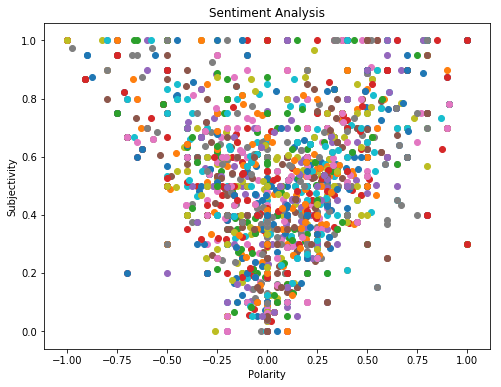

In [176]:
scatter(combi)

In [177]:
amazon_tweet.reset_index(inplace=True, drop=True)

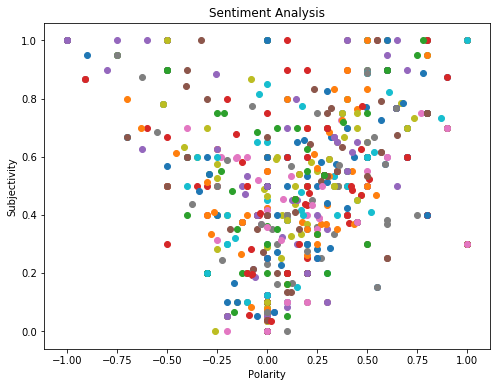

In [178]:
scatter(amazon_tweet)

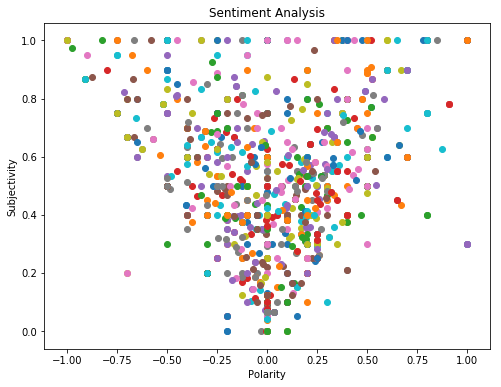

In [179]:
flipkart_tweet.reset_index(inplace=True, drop=True)
scatter(flipkart_tweet)

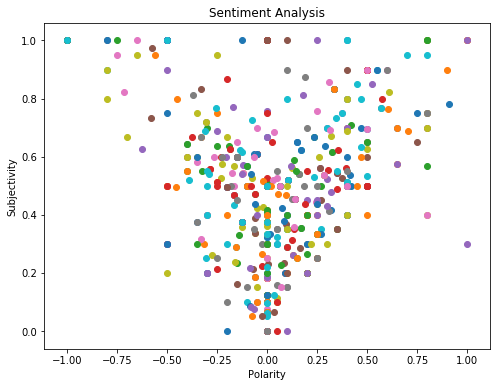

In [180]:
snapdeal_tweet.reset_index(inplace=True, drop=True)
scatter(snapdeal_tweet)

In [ ]:
# Now we can visually see the Polarity of the tweets, Most of the tweets lie in the Neutral section 
# amazon and snapdeal's Polarity can be seen more populated on right i.e.Positive,
# while flipkart shows kind of even distribution

In [181]:
def pie_plot(df): # Creting function for pie plot
    plt.subplots(figsize=(10,6))
    df.Analysis.value_counts().plot.pie(autopct='%.1f%%')

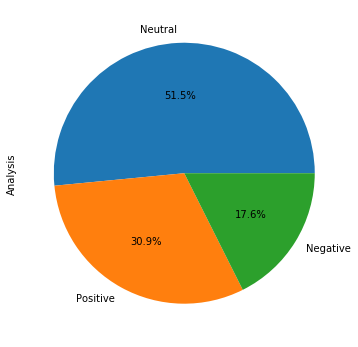

In [182]:
pie_plot(combi)

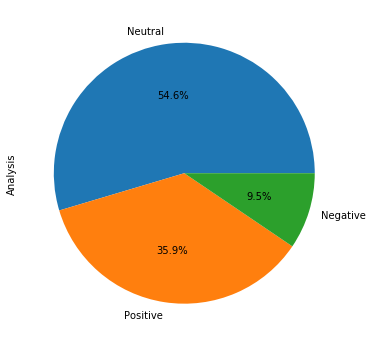

In [183]:
pie_plot(amazon_tweet) 

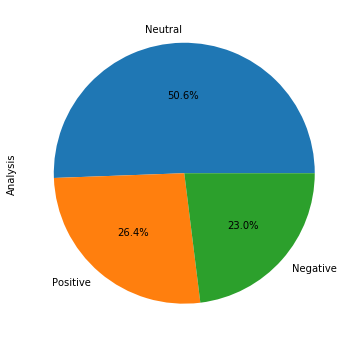

In [184]:
pie_plot(flipkart_tweet)

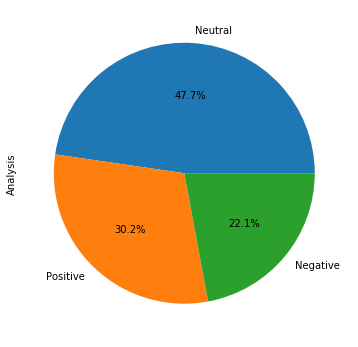

In [185]:
pie_plot(snapdeal_tweet)

In [186]:
# From the above visualisation we can see people sentiment toward flipkart is more negative compared to amazon and flipkart

In [207]:
def word_cloud(df, sentiment): # Function for Word CLoud
    words=' '.join([text for text in df[df['Analysis']==sentiment]['tweet']])
    wordcloud=WordCloud(width=800,height=500, random_state=21,max_font_size=100).generate(words)

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')

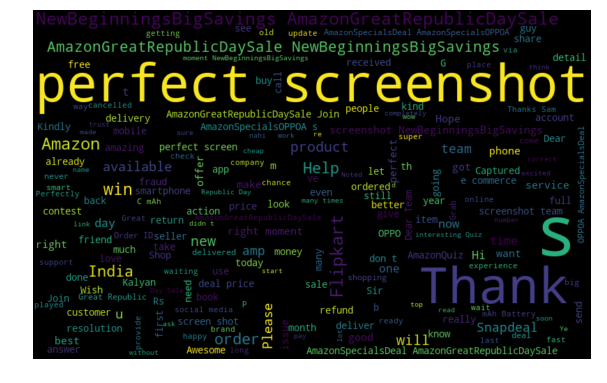

In [208]:
word_cloud(combi,'Positive')

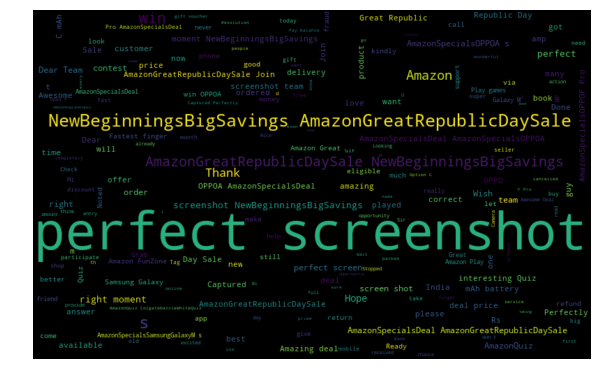

In [211]:
word_cloud(amazon_tweet, 'Positive')

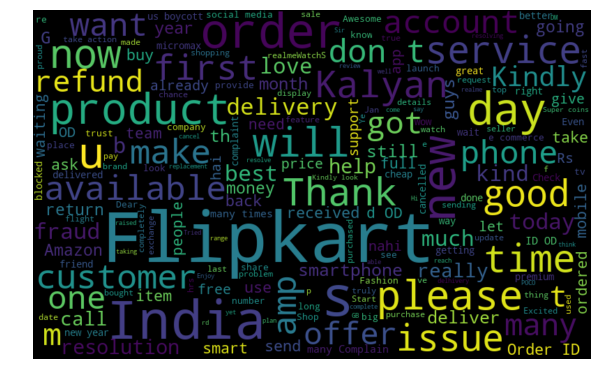

In [212]:
word_cloud(flipkart_tweet, 'Positive')

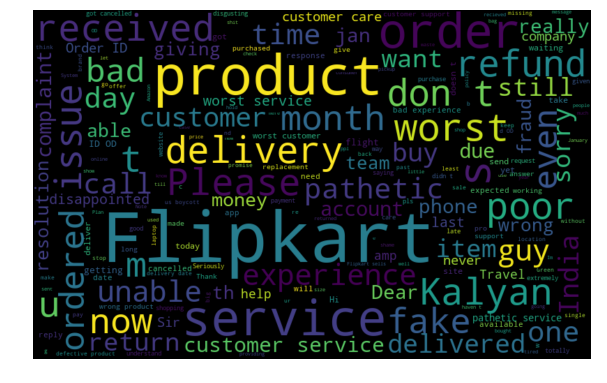

In [213]:
word_cloud(flipkart_tweet, 'Negative')

In [ ]:
# Customers seems to be dissatisfied with delivery and refund which is causing increase in Negative sentiment for Flipkart.

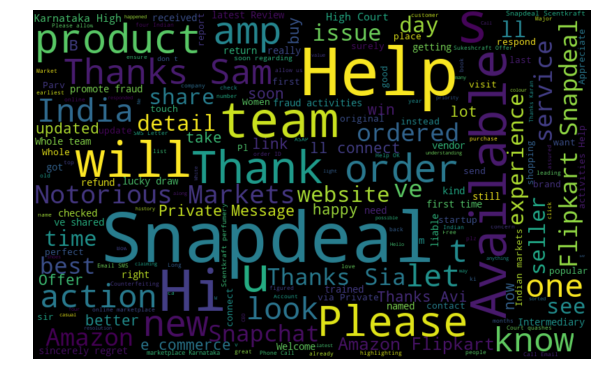

In [242]:
word_cloud(snapdeal_tweet, 'Positive')

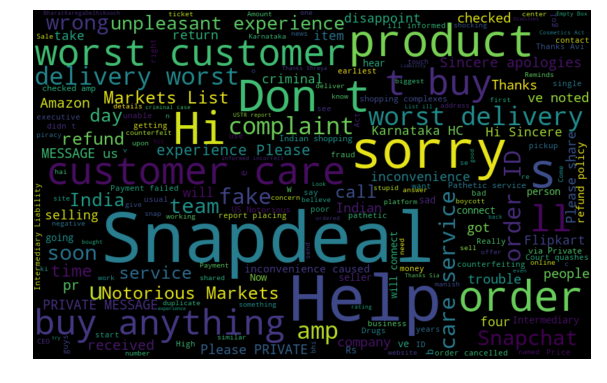

In [243]:
word_cloud(snapdeal_tweet, 'Negative')

## Sentiment Analysis of Products
### Oximeter

In [218]:
# Importing tweets on oximeter that we extracted from twitter.
oxi=pd.read_csv('oximeter.csv', index_col=0)
oxi.head()

,ID,tweet
0,1355161604552327172,@DillieKeane Advice: if possible get yourself a CE marked pulse oximeter. Measures your sats. Ca...
1,1355159395139801089,"@AlisonGeorge10 My OH not SoB but SpO2 84% on triage in ED, my SpO2 90% and only felt SoB on exe..."
2,1355157994045104129,@AlisonGeorge10 @KimSJ We purchased a pulse oximeter way back in January last year.
3,1355153703922184192,@AnnabelLake2 I have an oximeter which has kept me from a lot of anxiety. Had a fever &amp; coug...
4,1355152592129634307,"My father, a man with health anxiety, checked his oximeter reading upside down as pulse - 16 (it..."


In [219]:
# Preprocessing on the text
oxi['tweet']=oxi['tweet'].apply(cleantxt)
oxi.head()

,ID,tweet
0,1355161604552327172,Advice if possible get yourself a CE marked pulse oximeter Measures your sats Can drop witho...
1,1355159395139801089,My OH not SoB but SpO on triage in ED my SpO and only felt SoB on exertion by this ...
2,1355157994045104129,We purchased a pulse oximeter way back in January last year
3,1355153703922184192,I have an oximeter which has kept me from a lot of anxiety Had a fever amp cough difficulty...
4,1355152592129634307,My father a man with health anxiety checked his oximeter reading upside down as pulse it...


In [233]:
oxi.duplicated(subset='tweet').sum()

72

In [234]:
oxi.drop_duplicates(subset='tweet', inplace=True)

In [235]:
oxi.reset_index(inplace=True, drop=True)

In [236]:
oxi['Subjectivity']=oxi['tweet'].apply(get_subjectivity) #Adding a subjectivity column in dataset
oxi['Polarity']=oxi['tweet'].apply(get_polarity) #Adding a Polarity column in dataset
oxi.head()

,ID,tweet,Subjectivity,Polarity,Analysis
0,1355161604552327172,Advice if possible get yourself a CE marked pulse oximeter Measures your sats Can drop witho...,0.800000,0.050000,Positive
1,1355159395139801089,My OH not SoB but SpO on triage in ED my SpO and only felt SoB on exertion by this ...,1.000000,0.000000,Neutral
2,1355157994045104129,We purchased a pulse oximeter way back in January last year,0.033333,0.000000,Neutral
3,1355153703922184192,I have an oximeter which has kept me from a lot of anxiety Had a fever amp cough difficulty...,0.000000,0.000000,Neutral
4,1355152592129634307,My father a man with health anxiety checked his oximeter reading upside down as pulse it...,0.288889,-0.155556,Negative


In [237]:
oxi['Analysis']=oxi['Polarity'].apply(getanalysis) # Putting a clear Analysis based on the value of Polarity
oxi.head()

,ID,tweet,Subjectivity,Polarity,Analysis
0,1355161604552327172,Advice if possible get yourself a CE marked pulse oximeter Measures your sats Can drop witho...,0.800000,0.050000,Positive
1,1355159395139801089,My OH not SoB but SpO on triage in ED my SpO and only felt SoB on exertion by this ...,1.000000,0.000000,Neutral
2,1355157994045104129,We purchased a pulse oximeter way back in January last year,0.033333,0.000000,Neutral
3,1355153703922184192,I have an oximeter which has kept me from a lot of anxiety Had a fever amp cough difficulty...,0.000000,0.000000,Neutral
4,1355152592129634307,My father a man with health anxiety checked his oximeter reading upside down as pulse it...,0.288889,-0.155556,Negative


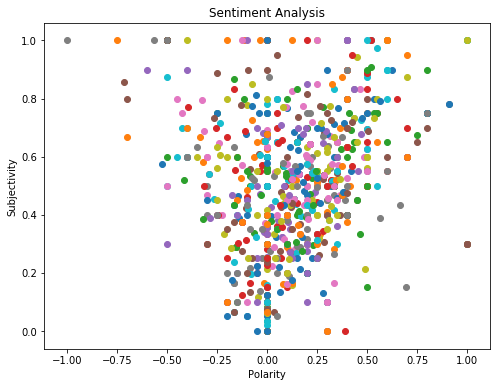

In [238]:
scatter(oxi) # Plotting a scatter to visualize the Polarity

In [ ]:
# Most of the points seems to be on the right of the graph indicating positive response to Oximeter

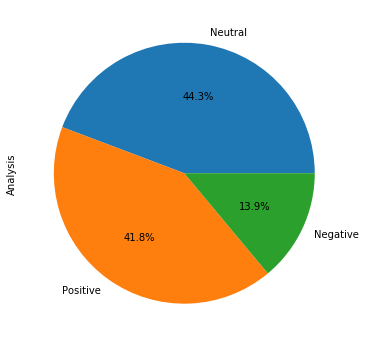

In [239]:
pie_plot(oxi) # Checking ecxact distribution of POsitive, Negative and Neutral tweeets

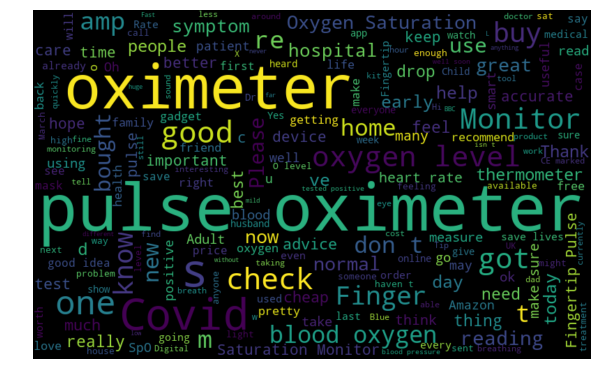

In [240]:
word_cloud(oxi, 'Positive') #Generating word cloud for Positive response on Oximeter

In [ ]:
# All the usefulness of the oximeter can be seen in the word cloud above,
# Blood oxygen, Oxygen level and most importantly word Covid seems to be used often in tweets
# indicating its been used a lot during Pandamic

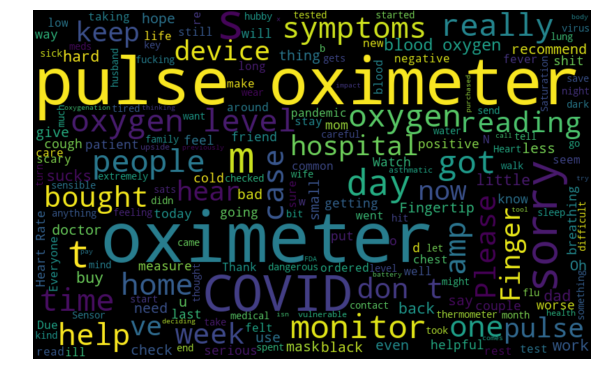

In [241]:
word_cloud(oxi, 'Negative')